<a href="https://colab.research.google.com/github/viveksharma19110/DataScience/blob/main/Assignment-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a file that contains 1000 lines of random strings using R

In [ ]:
# Set the number of lines
num_lines <- 1000

# Function to generate a random string
generate_random_string <- function(length) {
  chars <- c(letters, LETTERS, 0:9)
  random_chars <- sample(chars, length, replace = TRUE)
  paste0(random_chars, collapse = "")
}

# Generate random strings
random_strings <- replicate(num_lines, generate_random_string(10))

# Write the random strings to a file
file_name <- "random_strings.txt"
writeLines(random_strings, file_name)

# Print the file path
file_name

[1] "random_strings.txt"

Create a random dataset of 100 rows and 30 columns. All the values are defined between [7,200]. Perform
the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heatmap. Also select those columns having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10
(v) Replace all the values in the dataset with 1 if value <=0·5 else with O

[1] "Number of rows with missing values: 100"


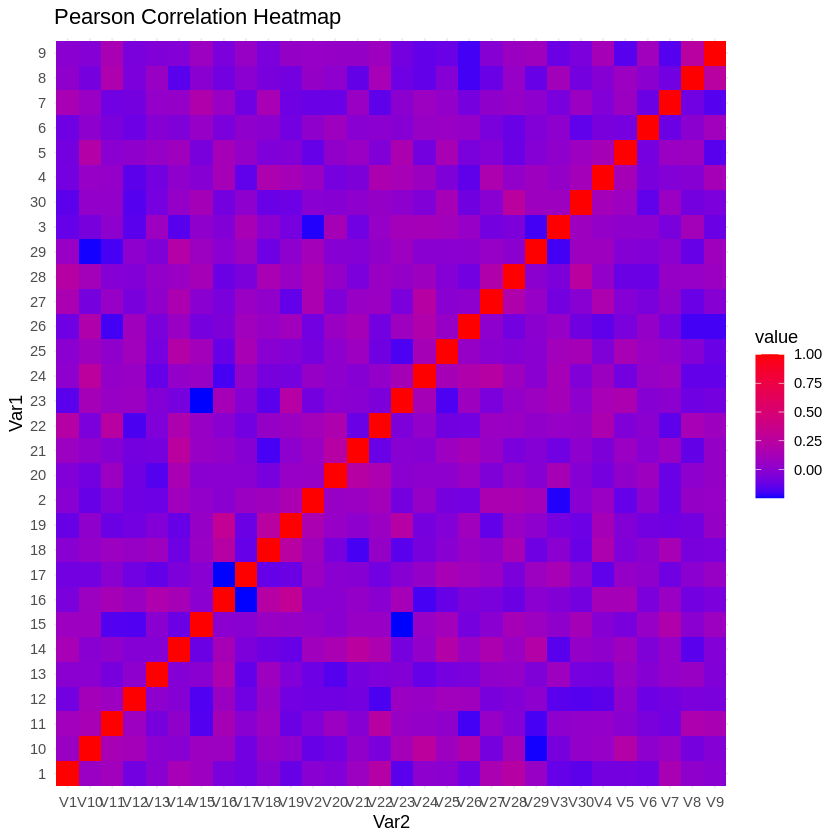

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Load necessary libraries
library(ggplot2)
library(tidyverse)

# Generate random dataset
dataset <- matrix(runif(3000, min = 7, max = 200), nrow = 100)

# Replace values between 10 and 60 with NA
dataset[dataset >= 10 & dataset <= 60] <- NA

# Count rows with missing values
rows_with_missing <- sum(rowSums(is.na(dataset)) > 0)
print(paste("Number of rows with missing values:", rows_with_missing))

# Replace NA values with column averages
dataset <- apply(dataset, 2, function(x) replace(x, is.na(x), mean(x, na.rm = TRUE)))

# Calculate Pearson correlation matrix
cor_matrix <- cor(dataset)

# Plot heatmap of correlations
cor_melted <- cor_matrix %>%
  as.data.frame() %>%
  rownames_to_column(var = "Var1") %>%
  gather(key = "Var2", value = "value", -Var1)

ggplot(data = cor_melted, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_minimal() +
  labs(title = "Pearson Correlation Heatmap")

# Find columns with correlation <= 0.7
cor_threshold <- 0.7
columns_to_select <- colnames(cor_matrix)[apply(cor_matrix, 2, function(x) any(abs(x) <= cor_threshold))]

# Normalize values between 0 and 10
normalized_dataset <- apply(dataset, 2, function(x) 10 * (x - min(x)) / (max(x) - min(x)))

# Replace values with 1 if <= 0.5, else with 0
dataset_binary <- ifelse(dataset <= 0.5, 1, 0)


Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plotdistance metric
graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering

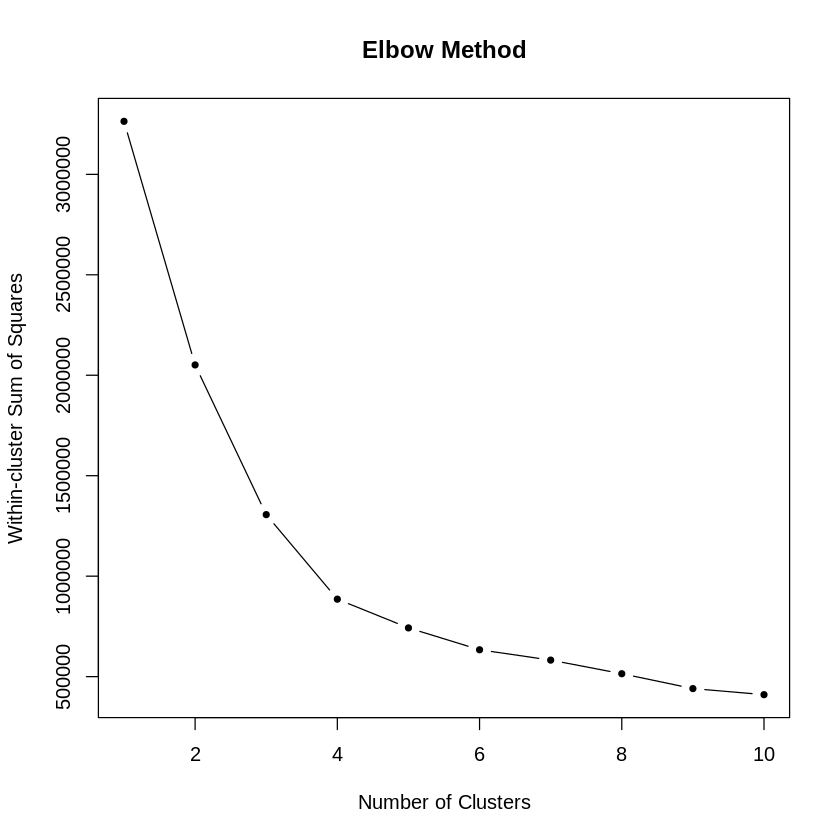

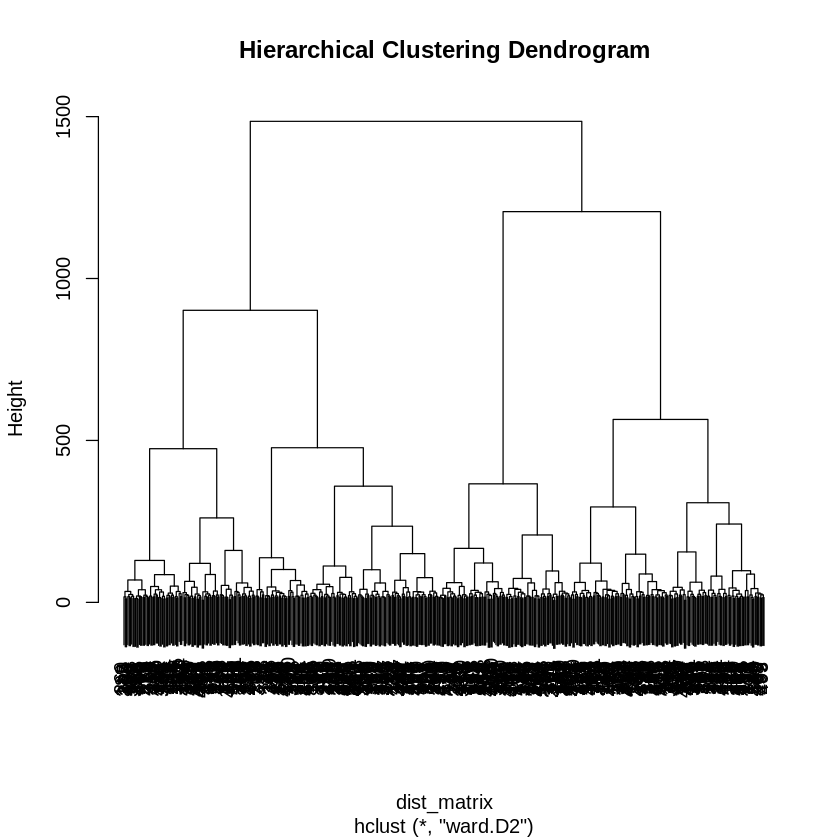

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(data = NA, nrow = 500, ncol = 10)
column_ranges <- list(c(-10, 10), c(-10, 10), c(-10, 10), c(-10, 10),
                      c(10, 20), c(10, 20), c(10, 20), c(10, 20),
                      c(-100, 100), c(-100, 100))
for (i in 1:10) {
  dataset[, i] <- runif(500, min = column_ranges[[i]][1], max = column_ranges[[i]][2])
}

# Perform K-Means clustering
kmeans_clusters <- lapply(1:10, function(k) {
  kmeans(dataset, centers = k)
})

# Determine optimal number of clusters using the elbow method
wss <- sapply(kmeans_clusters, function(result) result$tot.withinss)
elbow_plot <- plot(1:10, wss, type = "b", pch = 20, xlab = "Number of Clusters",
                   ylab = "Within-cluster Sum of Squares", main = "Elbow Method")

# Perform Hierarchical clustering
dist_matrix <- dist(dataset)
hierarchical_clusters <- hclust(dist_matrix, method = "ward.D2")

# Plot the dendrogram
dendrogram <- plot(hierarchical_clusters, main = "Hierarchical Clustering Dendrogram")

Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].
(i) Plotscatter graph between Column 5 and Column 6.
Perform the following operations: (ii) Plothistogram of each column in single graph. (iii) Plot the Box plotof each column in single graph

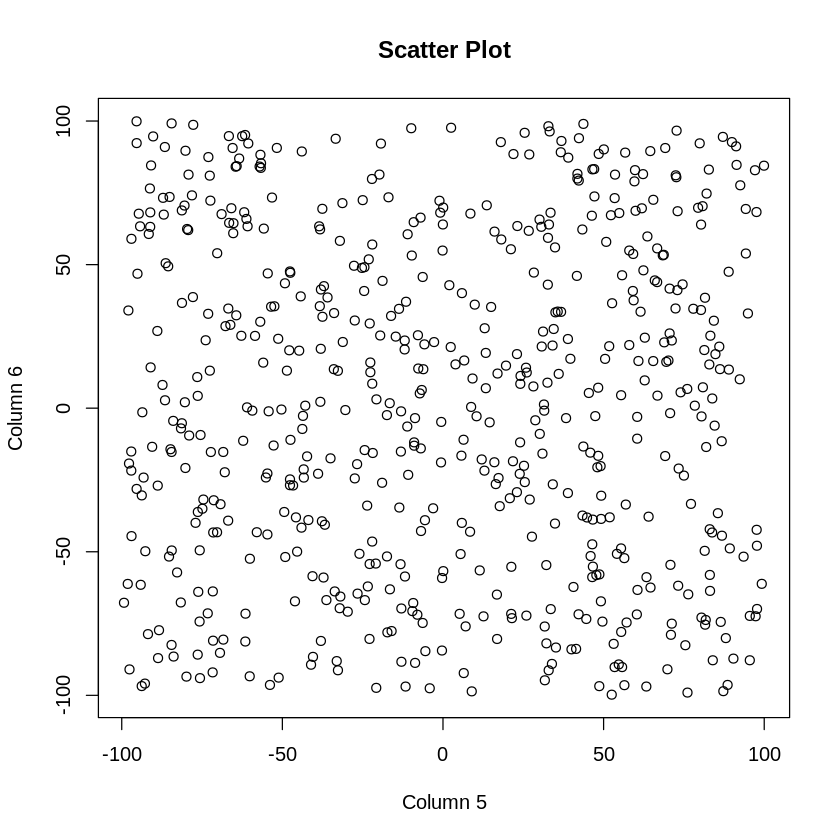

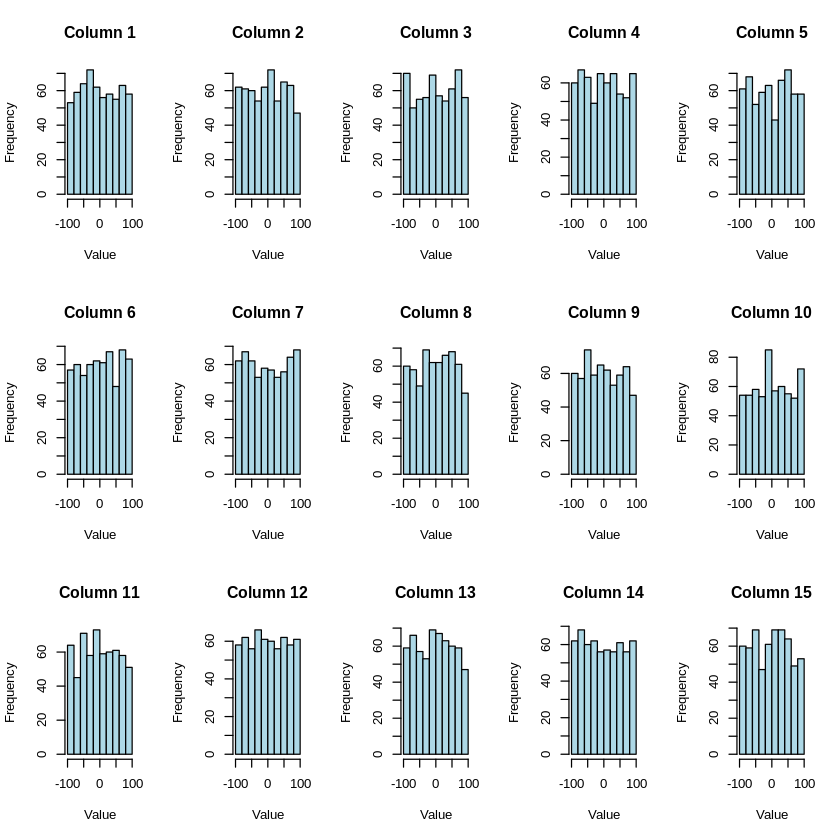

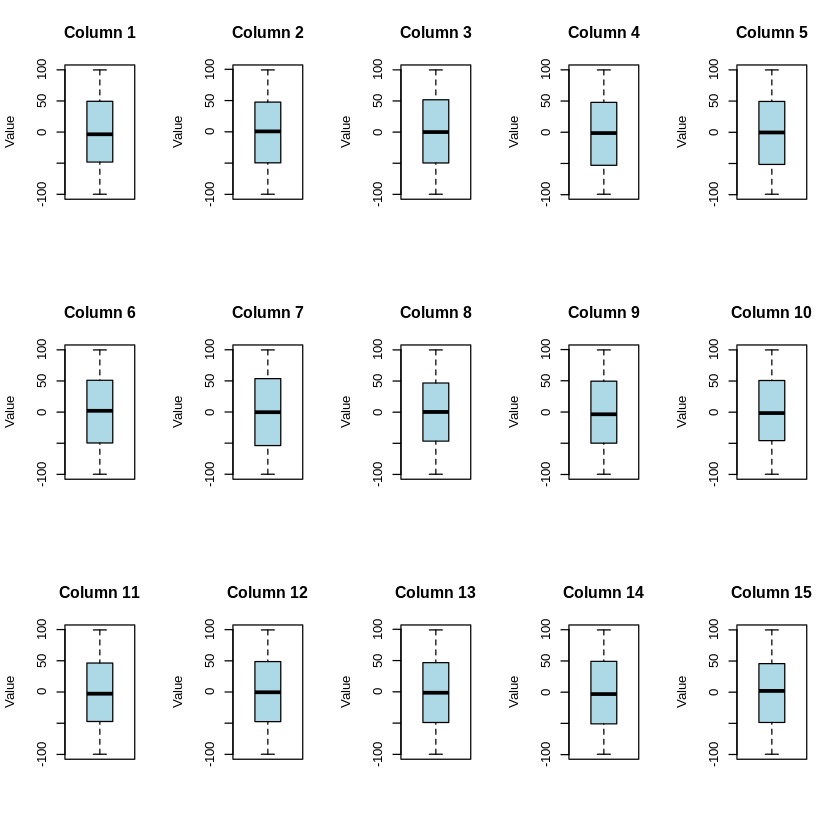

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(runif(600 * 15, min = -100, max = 100), nrow = 600, ncol = 15)

# Plot scatter graph between Column 5 and Column 6
plot(dataset[, 5], dataset[, 6], xlab = "Column 5", ylab = "Column 6", main = "Scatter Plot")

# Plot histogram of each column in a single graph
par(mfrow = c(3, 5))  # Set the layout to 3 rows and 5 columns

for (i in 1:15) {
  hist(dataset[, i], main = paste("Column", i), xlab = "Value", col = "lightblue")
}

# Plot the box plot of each column in a single graph
par(mfrow = c(3, 5))  # Set the layout to 3 rows and 5 columns

for (i in 1:15) {
  boxplot(dataset[, i], main = paste("Column", i), ylab = "Value", col = "lightblue")
}


Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:
(i) Perform tTeston each column.
(ii) Perform Wilcoxon Signed Rank Teston each column.
(iii) Perform Two Sample tTestand Wilcoxon Rank Sum Teston Column 3 and Column 4

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(runif(500 * 5, min = 5, max = 10), nrow = 500, ncol = 5)

# Perform t-tests on each column
ttest_results <- lapply(1:5, function(i) {
  t.test(dataset[, i])
})

# Perform Wilcoxon signed rank tests on each column
wilcox_results <- lapply(1:5, function(i) {
  wilcox.test(dataset[, i])
})

# Perform two-sample t-test and Wilcoxon rank sum test on Column 3 and Column 4
column3 <- dataset[, 3]
column4 <- dataset[, 4]

two_sample_ttest <- t.test(column3, column4)
wilcox_ranksum <- wilcox.test(column3, column4)

# Print the results
for (i in 1:5) {
  cat("Column", i, "\n")
  cat("T-Test:\n")
  print(ttest_results[[i]])
  cat("\nWilcoxon Signed Rank Test:\n")
  print(wilcox_results[[i]])
  cat("---------------\n")
}

cat("Two Sample T-Test (Column 3 vs Column 4):\n")
print(two_sample_ttest)
cat("\nWilcoxon Rank Sum Test (Column 3 vs Column 4):\n")
print(wilcox_ranksum)


Column 1 
T-Test:

	One Sample t-test

data:  dataset[, i]
t = 117.56, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.351464 7.601373
sample estimates:
mean of x 
 7.476418 


Wilcoxon Signed Rank Test:

	Wilcoxon signed rank test with continuity correction

data:  dataset[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0

---------------
Column 2 
T-Test:

	One Sample t-test

data:  dataset[, i]
t = 115.29, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.368610 7.624109
sample estimates:
mean of x 
  7.49636 


Wilcoxon Signed Rank Test:

	Wilcoxon signed rank test with continuity correction

data:  dataset[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0

---------------
Column 3 
T-Test:

	One Sample t-test

data:  dataset[, i]
t = 117.93, df = 499, p-value < 2.2e-16
a